In [1]:
# '''create new ipython kernel if needed'''
# !python -m ipykernel install --user --name=axonenv
'''check python interpreter path'''
import sys
print(sys.executable)
sys.path.append('/home/adam/MEA_Analysis/AxonReconPipeline')

/home/adam/miniconda3/envs/axonenv/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, ttest_ind
import statsmodels.stats.multitest as mt
import logging
import ast
import pingouin as pg

color_map = {'WT': '#0000FF',   #blue
             'HET': '#FF0000',  #red
             'HOM': '#FFA500'   #orange
             }

# Logging setup
#reset logger
import logging
logger = logging.getLogger(__name__)  # Create a logger
logger.setLevel(logging.DEBUG)
stream_handler = logging.StreamHandler()  # Create handlers, logs to console
#stream_handler.setLevel(logging.DEBUG)  # Set level of handlers
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s - %(module)s.%(funcName)s')
stream_handler.setFormatter(formatter)
logger.addHandler(stream_handler)  # Add handlers to the logger

In [3]:
import pandas as pd
import os

# Define the root path
root_path = '/home/adam/workspace/git_workspace/MEA_Analysis_fork/AxonReconPipeline/data_csvs/reconstructions_KCNT1_T3_C1_03122024'

'''get current working directory, change it to project root directory'''
os.getcwd()
os.chdir('/home/adam/workspace/git_workspace/MEA_Analysis_fork/AxonReconPipeline')

# Last Updated 5Aug2024, sg",
# Load the uploaded files into dataframes
# TODO: T5 doesnt have any axontracking, but T6 does and will.
files_dict = {
    "DIV10": {
        "T3": { 
            #one recording missing, well 3
            "files": [
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240322_M07037_000025_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV13": {
        "T3": {
            "files": [
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240325_M07037_000036_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV16": {
        "T3": {
            "files": [
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240328_M07037_000055_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV21": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240402_M07037_000065_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV24": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240405_M07037_000077_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV28": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well003_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240409_M07037_000095_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    },
    "DIV31": {
        "T3": {
            #TODO: Note why there are missing data here.
            "files": [
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well000_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well001_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well002_axon_analytics_dvdt.csv'), "WT"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well003_axon_analytics_dvdt.csv'), "HOM"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well004_axon_analytics_dvdt.csv'), "HET"),
                (os.path.join(root_path, '240412_M07037_000107_AxonTracking_well005_axon_analytics_dvdt.csv'), "WT"),
            ]
        }
    }
}

In [4]:

file_paths = []
categories = []
divs = []

for div, div_data in files_dict.items():
    for t, t_data in div_data.items():
        for file_path, category in t_data["files"]:
            file_paths.append(file_path)
            categories.append(category)
            divs.append(int(div[3:]))  # Extract the DIV number

# Verify files exist
for file in file_paths:
    try:
        assert os.path.exists(file), f"File {file} does not exist"
    except Exception as e:
        print(e)
        pass

try: assert len(categories) == len(divs) == len(categories), "Length of categories and DIVs must be equal to the number of files"
except AssertionError as e: 
    print(e)
    print(len(categories), len(divs), len(file_paths))

#Modify lists to exclude data based on position in categories
#categories = [categories[i] for i in range(len(categories)) if categories[i] != 'HOM']
#categories = [categories[i] for i in range(len(categories)) if categories[i] != 'HET']
#categories = [categories[i] for i in range(len(categories)) if categories[i] != 'WT']

In [10]:
'''Analyze and Treat Data'''
def load_data(file_paths, categories, divs):
    """Load data from CSV files and append category and DIV information."""
    data = []
    for file_path, category, div in zip(file_paths, categories, divs):
        df = pd.read_csv(file_path)
        df.insert(0, 'category', category) #Insert category column at position 0
        df.insert(1, 'DIV', div)
        df = df.to_dict()
        #eval all lists in the dataframe
        for key, value in df.items(): 
            #if isinstance(value, str):
                #df[key] = [eval(val) for val in value]
            #if isinstance(value, dict):
            check = True
            try: eval(df[key][0]) #check if eval works
            except: check = False
            if check: df[key] = [eval(val) for val in value.values() if isinstance(val, str) and val.startswith('[')]
        data.append(df)
    return data

def count_units_and_branches(data, verbose=False):
    """Count units and branches grouped by DIV and Category."""
    #Old method:
    # unit_count = 0
    # branch_count = 0
    # for df in data:
    #     required_columns = ['DIV', 'Category', 'unit_ids', 'branch_id']
    #     if not all(column in df.columns for column in required_columns):
    #         raise ValueError(f"Data must contain the following columns: {required_columns}")
    
    #     unit_count += len(df['unit_ids'].index)
    #     branch_counts = [len(eval(branch_list)) for branch_list in df['branch_id']]
    #     branch_count += sum(branch_counts)

    #New method:
    tot_unit_count = 0
    tot_branch_count = 0
    for well in data:
        unit_count = len(well['unit_ids'])
        branch_count = [len(branch_list) for branch_list in well['branch_id']]
        branch_count = sum(branch_count)
        if verbose: print(f'DIV: {well["DIV"][0]}, Category: {well["category"][0]}, Units: {unit_count}, Branches: {branch_count}, Mean Branches per unit: {branch_count / unit_count}')

        # Update total counts
        tot_unit_count += unit_count
        tot_branch_count += branch_count    
    #print(f'Total units: {tot_unit_count}, Total branches: {tot_branch_count}')
    return tot_unit_count, tot_branch_count

def validate_template_densities(data, std=1, verbose=False, method='by_well'):
    """Validate and filter density data based on given criteria."""
    print('Validating templates...')
    print(f'Method: {method}')
    
    def get_density_threshold(density_values):
        density_values = pd.Series(density_values)
        
        # Calculate the mean and standard deviation
        mean_value = density_values.mean()
        std_dev = density_values.std()

        # Define the threshold as one standard deviation below the mean
        density_threshold = mean_value - std_dev*std
        return density_threshold
    
    def filter_data(data, density_values, threshold):
        """Filter data based on density threshold."""
        before_count = len(data["unit_ids"])
        valid_indices = [idx for idx, val in enumerate(density_values) if val >= threshold]
        valid_return = {key: [val[idx] for idx in valid_indices] for key, val in data.items()}
        after_count = len(valid_return["unit_ids"])
        if verbose: print(f'Before: {before_count} units, After: {after_count} units')
        return valid_return
    
    valid_data = data.copy()

    if method == 'by_well': #TODO: Update and implement if needed.
        raise NotImplementedError("Method 'by_well' is not implemented yet.")
        for i, well in enumerate(data):
            # Extract and evaluate 'channel_density'
            density_values = [d[0] for d in well['channel_density']]
            density_threshold = pd.Series(density_values).quantile(threshold)
            valid_data[i] = filter_data(well, density_values, density_threshold)
            if verbose: print(f'Well {i}, Density threshold: {density_threshold}')

    elif method == 'by_DIV':
        divs = set(well['DIV'][0] for well in data)
        for div in divs:
            div_data = [well for well in data if well['DIV'][0] == div]
            pre_unit_count, _ = count_units_and_branches(div_data, verbose=False)
            try: assert len(div_data) > 0, f"No data found for DIV {div}"
            except AssertionError as e: print(e); continue
            combined_density_values = [d[0] for well in div_data for d in well['channel_density']]
            combined_density_values.sort()
            density_threshold = get_density_threshold(combined_density_values)
            for i, well in enumerate(div_data):
                density_values = [d[0] for d in well['channel_density']]
                density_values.sort()
                valid_data[valid_data.index(well)] = filter_data(well, density_values, density_threshold)
            if verbose: 
                print(f'DIV {div}, Density threshold: {density_threshold}')
            div_data = [well for well in valid_data if well['DIV'][0] == div]
            post_unit_count, _ = count_units_and_branches(div_data, verbose=False)
            print(f'DIV {div}, Units before: {pre_unit_count}, Units after: {post_unit_count}')

    elif method == 'by_category': #TODO: Update and implement if needed.
        raise NotImplementedError("Method 'by_category' is not implemented yet.")
        categories = set(well['category'][0] for well in data)
        for category in categories:
            category_data = [well for well in data if well['category'][0] == category]
            try: assert len(category_data) > 0, f"No data found for category {category}"
            except AssertionError as e: print(e); continue
            combined_density_values = [d[0] for well in category_data for d in well['channel_density']]
            density_threshold = pd.Series(combined_density_values).quantile(threshold)
            for i, well in enumerate(category_data):
                density_values = [d[0] for d in well['channel_density']]
                valid_data[valid_data.index(well)] = filter_data(well, density_values, density_threshold)
            if verbose:
                print(f'Category {category}, Density threshold: {density_threshold}')

    elif method == 'global':
        combined_density_values = [d[0] for well in data for d in well['channel_density']]
        density_threshold = get_density_threshold(combined_density_values)
        for i, well in enumerate(data):
            density_values = [d[0] for d in well['channel_density']]
            valid_data[i] = filter_data(well, density_values, density_threshold)
        if verbose:
            print(f'Global density threshold: {density_threshold}')

    valid_units, valid_branches = count_units_and_branches(valid_data)
    #print('After density validation:')
    print(f'Total units: {valid_units}, Total branches: {valid_branches}')
    
    return valid_data

def validate_branch_lengths_data(data, min_length=0, stdevs=3, outlier_method='by_DIV', remove_outlier_data=False):
    """Validate and filter branch lengths data based on given criteria."""
    #Old method:
    # data_copy = data.copy()
    # total_units, total_branches = len(set(data_copy['unit_ids'])), len(data_copy['branch_id'])
    # print('Before branch length validation:')
    # print(f'Total units: {total_units}, Total branches: {total_branches}')
    
    # data_copy['length'] = data_copy['length'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    # valid_data = data_copy[data_copy['length'].apply(lambda x: x > 0)]
    # valid_data = valid_data[np.abs(valid_data['length'] - valid_data['length'].mean()) <= (stdevs * valid_data['length'].std())]

    # valid_units, valid_branches = len(set(valid_data['unit_ids'])), len(valid_data['branch_id'])
    # print('After branch length validation:')
    # print(f'Total units: {valid_units}, Total branches: {valid_branches}')

    #New method:
    print('Validating branch lengths...')
    def remove_short_branches(data, min_length):
        valid_data = data.copy()
        for i, well in enumerate(data):
            for unit_idx, branch_lengths in enumerate(well['length']):
                valid_lengths = []
                valid_branch_ids = []
                for j, branch_length in enumerate(branch_lengths):
                    if branch_length > min_length:
                        valid_lengths.append(branch_length)
                        valid_branch_ids.append(well['branch_id'][unit_idx][j])
                valid_data[i]['length'][unit_idx] = valid_lengths
                valid_data[i]['branch_id'][unit_idx] = valid_branch_ids
        return valid_data

    def remove_outliers(data, stdevs, method='by_DIV'):
        def filter_data(well, branch_lengths, mean_length, std_length):
            valid_lengths = []
            valid_branch_ids = []
            for j, length in enumerate(branch_lengths):
                if np.abs(length - mean_length) <= stdevs * std_length:
                    valid_lengths.append(length)
                    valid_branch_ids.append(well['branch_id'][unit_idx][j])
            return valid_lengths, valid_branch_ids

        valid_data = data.copy()

        if method == 'by_DIV':
            divs = set(well['DIV'][0] for well in data)
            for div in divs:
                div_data = [well for well in data if well['DIV'][0] == div]
                _, pre_branch_count = count_units_and_branches(div_data)
                #print(f'DIV {div}: Before outlier removal: {pre_branch_count} branches')
                for well in div_data:
                    for unit_idx, branch_lengths in enumerate(well['length']):
                        mean_length = np.mean(branch_lengths)
                        std_length = np.std(branch_lengths)
                        valid_lengths, valid_branch_ids = filter_data(well, branch_lengths, mean_length, std_length)
                        valid_data[valid_data.index(well)]['length'][unit_idx] = valid_lengths
                        valid_data[valid_data.index(well)]['branch_id'][unit_idx] = valid_branch_ids
                div_data = [well for well in valid_data if well['DIV'][0] == div]
                _, post_branch_count = count_units_and_branches(div_data)
                #print(f'DIV {div}: After outlier removal: {post_branch_count} branches')
                print(f'DIV {div}: Before: {pre_branch_count} branches, After: {post_branch_count} branches')

        elif method == 'by_well':
            for i, well in enumerate(data):
                for unit_idx, branch_lengths in enumerate(well['length']):
                    mean_length = np.mean(branch_lengths)
                    std_length = np.std(branch_lengths)
                    valid_lengths, valid_branch_ids = filter_data(well, branch_lengths, mean_length, std_length)
                    valid_data[i]['length'][unit_idx] = valid_lengths
                    valid_data[i]['branch_id'][unit_idx] = valid_branch_ids

        return valid_data
    
    valid_data = data.copy()
    _, pre_branch_count = count_units_and_branches(valid_data)
    valid_data = remove_short_branches(valid_data, min_length)
    if remove_outlier_data: valid_data = remove_outliers(valid_data, stdevs, method=outlier_method)
    _, post_branch_count = count_units_and_branches(valid_data)
    print(f'Before: {pre_branch_count} branches, After: {post_branch_count} branches')   
    return valid_data

def validate_velocity_data(data, stdevs=3, outlier_method='by_DIV', remove_outlier_data=False):
    """Validate and filter velocity data based on given criteria."""
    print('Validating velocity data...')
    
    def remove_negative_velocities(data):
        valid_data = data.copy()
        for i, well in enumerate(data):
            for unit_idx, velocities in enumerate(well['velocity']):
                valid_velocities = []
                valid_branch_ids = []
                for j, velocity in enumerate(velocities):
                    if velocity >= 0:
                        valid_velocities.append(velocity)
                        valid_branch_ids.append(well['branch_id'][unit_idx][j])
                valid_data[i]['velocity'][unit_idx] = valid_velocities
                valid_data[i]['branch_id'][unit_idx] = valid_branch_ids
        return valid_data

    def remove_outliers(data, stdevs, method='by_DIV'):
        def filter_data(well, velocities, mean_velocity, std_velocity):
            valid_velocities = []
            valid_branch_ids = []
            for j, velocity in enumerate(velocities):
                if np.abs(velocity - mean_velocity) <= stdevs * std_velocity:
                    valid_velocities.append(velocity)
                    valid_branch_ids.append(well['branch_id'][unit_idx][j])
            return valid_velocities, valid_branch_ids

        valid_data = data.copy()

        if method == 'by_DIV':
            divs = set(well['DIV'][0] for well in data)
            for div in divs:
                div_data = [well for well in data if well['DIV'][0] == div]
                _, pre_branch_count = count_units_and_branches(div_data)
                for well in div_data:
                    for unit_idx, velocities in enumerate(well['velocity']):
                        mean_velocity = np.mean(velocities)
                        std_velocity = np.std(velocities)
                        valid_velocities, valid_branch_ids = filter_data(well, velocities, mean_velocity, std_velocity)
                        valid_data[valid_data.index(well)]['velocity'][unit_idx] = valid_velocities
                        valid_data[valid_data.index(well)]['branch_id'][unit_idx] = valid_branch_ids
                div_data = [well for well in valid_data if well['DIV'][0] == div]
                _, post_branch_count = count_units_and_branches(div_data)
                print(f'DIV {div}: Before: {pre_branch_count} branches, After: {post_branch_count} branches')

        elif method == 'by_well':
            for i, well in enumerate(data):
                for unit_idx, velocities in enumerate(well['velocity']):
                    mean_velocity = np.mean(velocities)
                    std_velocity = np.std(velocities)
                    valid_velocities, valid_branch_ids = filter_data(well, velocities, mean_velocity, std_velocity)
                    valid_data[i]['velocity'][unit_idx] = valid_velocities
                    valid_data[i]['branch_id'][unit_idx] = valid_branch_ids

        return valid_data
    
    valid_data = data.copy()
    _, pre_branch_count = count_units_and_branches(valid_data)
    valid_data = remove_negative_velocities(valid_data)
    if remove_outlier_data:
        valid_data = remove_outliers(valid_data, stdevs, method=outlier_method)
    _, post_branch_count = count_units_and_branches(valid_data)
    print(f'Before: {pre_branch_count} branches, After: {post_branch_count} branches')   
    return valid_data

def validate_and_extract_branch_counts(data, verbose=False):
    """Validate and filter number of branches data based on given criteria."""
    print('Validating and extracting branch counts...')
    valid_data = data.copy()
    initial_unit_count, initial_branch_count = count_units_and_branches(valid_data)

    filtered_data = []
    for well in valid_data:
        unit_count = len(well['unit_ids'])
        branch_counts = [len(branch_list) for branch_list in well['branch_id']]
        
        if any(branch_counts):
            well['branch_counts'] = branch_counts
            filtered_data.append(well)

    final_unit_count, final_branch_count = count_units_and_branches(filtered_data)

    print(f'Before: {initial_unit_count} units, After: {final_unit_count} units')
    #print(f'Before: {initial_branch_count} branches, After: {final_branch_count} branches')
    
    return filtered_data

def extract_branch_lengths(data):
    """Extract branch lengths for high-density regions with positive velocities."""
    unit_ids, lengths, categories, DIVs, branch_lists = [], [], [], [], []
    unit_count = 0
    for df in data:
        category, div = df['Category'].iloc[0], df['DIV'].iloc[0]
        for unit_id, length_list, velocity_list, density, branch_list in zip(df['unit_ids'], df['length'], df['velocity'], df['channel_density'], df['branch_id']):
            length_list = eval(length_list)
            branch_lists.extend(eval(branch_list))
            unit_ids.extend([unit_count] * len(length_list))
            lengths.extend(length_list)
            categories.extend([category] * len(length_list))
            DIVs.extend([div] * len(length_list))
            unit_count += 1
    return pd.DataFrame({'unit_ids': unit_ids, 'length': lengths, 'Category': categories, 'DIV': DIVs, 'branch_id': branch_lists})

def extract_branch_velocities(data):
    """Extract branch velocities for high-density regions with positive velocities."""
    unit_ids, velocities, categories, DIVs, branch_lists = [], [], [], [], []
    unit_count = 0
    for df in data:
        category, div = df['Category'].iloc[0], df['DIV'].iloc[0]
        for unit_id, velocity_list, density, branch_list in zip(df['unit_ids'], df['velocity'], df['channel_density'], df['branch_id']):
            velocity_list = eval(velocity_list)
            branch_lists.extend(eval(branch_list))
            unit_ids.extend([unit_count] * len(velocity_list))
            velocities.extend(velocity_list)
            categories.extend([category] * len(velocity_list))
            DIVs.extend([div] * len(velocity_list))
            unit_count += 1
    return pd.DataFrame({'unit_ids': unit_ids, 'Velocity': velocities, 'Category': categories, 'DIV': DIVs, 'branch_id': branch_lists})

def extract_number_of_branches(data):
    """Extract the number of branches with positive velocities for high-density regions."""
    unit_ids, num_branches, branches, categories, DIVs = [], [], [], [], []
    unit_count = 0
    for df in data:
        category, div = df['Category'].iloc[0], df['DIV'].iloc[0]
        for unit_id, branches_list, velocity_list, density in zip(df['unit_ids'], df['branch_id'], df['velocity'], df['channel_density']):
            #velocity_list = eval(velocity_list)
            branches_list = eval(branches_list)
            unit_ids.extend([unit_count]*len(branches_list))
            branches.append(branches_list)
            categories.extend([category] * len(velocity_list))
            DIVs.extend([div] * len(velocity_list))
            num_branches.append(len(branches_list))
            unit_count += 1
    return pd.DataFrame({'unit_ids': unit_ids, 'num_branches': num_branches, 'branch_id': branches, 'Category': categories, 'DIV': DIVs})

def add_significance_annotations(ax, data, y, group_by, print_stats=False, bar_width=0.8/3, stagger=0.5):
    """Add significance annotations to the plot."""
    # Disclaimer for the significance stars
    print("Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.")

    divs = data['DIV'].unique()
    pairs, p_values = [], []

    for div in divs:
        data_div = data[data['DIV'] == div]
        categories = data_div[group_by].unique()
        pairs_div = [(cat1, cat2) for i, cat1 in enumerate(categories) for cat2 in categories[i+1:]]
        
        for (cat1, cat2) in pairs_div:
            data1 = data_div[data_div[group_by] == cat1][y]
            data2 = data_div[data_div[group_by] == cat2][y]
            t_stat, p_val = ttest_ind(data1, data2)
            pairs.append((div, cat1, cat2))
            p_values.append(p_val)
            if print_stats: 
                print(f'Comparing {cat1} vs {cat2} at DIV {div}: t-statistic={t_stat}, p-value={p_val}')

    # Track the number of annotations for staggering
    annotations_per_div = {div: 0 for div in divs}

    for (div, cat1, cat2), p_val in zip(pairs, p_values):
        if p_val <= 0.05:
            stars = ""
            if p_val <= 0.0001:
                stars = "****"
            elif p_val <= 0.001:
                stars = "***"
            elif p_val <= 0.01:
                stars = "**"
            elif p_val <= 0.05:
                stars = "*"
            
            if stars:
                x_ind = list(divs).index(div)
                categories = data[data['DIV'] == div][group_by].unique()
                cat1_index = list(categories).index(cat1)
                cat2_index = list(categories).index(cat2)

                div_pos = x_ind
                div_width = len(categories)*bar_width
                div_start = div_pos - div_width/2
                bar1_pos = div_start + (cat1_index)*bar_width + bar_width/2
                bar2_pos = div_start + (cat2_index)*bar_width + bar_width/2
                x1 = bar1_pos
                x2 = bar2_pos
                
                y_max = data[data['DIV'] == div][y].max()
                stagger_offset = annotations_per_div[div] * stagger
                y, h, col = y_max + 1 + stagger_offset, 1, 'k'
                
                # Plot horizontal line for the significance annotation
                ax.plot([x1, x2], [y + h, y + h], lw=1.5, c=col)
                
                # Plot vertical dotted lines extending downward to approximately 50% of the distance
                ax.plot([x1, x1], [y*0.66, y + h], lw=1.5, ls='dotted', c=col)
                ax.plot([x2, x2], [y*0.66, y + h], lw=1.5, ls='dotted', c=col)
                
                # Add the stars for significance
                ax.text((x1 + x2) / 2, y + h, stars, ha='center', va='bottom', color=col)

                # Increment the number of annotations for staggering
                annotations_per_div[div] += 1

                if print_stats: 
                    print(f'Significant difference between {cat1} and {cat2} at DIV {div}: p-value={p_val}, stars={stars}')

def plot_with_significance(data, y, title, ylabel, scatter=True, cats=['WT', 'HET', 'HOM'], print_stats=False, div_width=.8):
    """Plot data with significance annotations and outliers as diamonds."""
    plt.figure(figsize=(12, 8))
    sorted_data = data[data['Category'].isin(cats)].copy()
    sorted_data['Category'] = pd.Categorical(sorted_data['Category'], categories=cats, ordered=True)
    
    palette = [color_map[cat] for cat in sorted_data['Category'].cat.categories]
    ax = sns.barplot(x='DIV', y=y, hue='Category', data=sorted_data, palette=palette, alpha=0.6, errorbar='se', width=div_width)
    if scatter: sns.stripplot(x='DIV', y=y, hue='Category', data=sorted_data, jitter=True, dodge=True, marker='D', alpha=0.6, palette=palette, ax=ax, edgecolor='gray')
    
    bar_width = div_width / len(cats)
    add_significance_annotations(ax, sorted_data, y, 'Category', print_stats=print_stats, bar_width=bar_width)
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('DIV')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[0:3], labels[0:3], title='Category')
    plt.show()

    return ax

# Validate data through all steps and combine filters
def combine_validations(valid_data, stddevs=3):
    branch_lengths_data = extract_branch_lengths(valid_data)
    branch_velocities_data = extract_branch_velocities(valid_data)
    number_of_branches_data = extract_number_of_branches(valid_data)

    valid_bl_data = validate_branch_lengths_data(branch_lengths_data, stdevs=3)
    valid_velocities_data = validate_velocity_data(branch_velocities_data, stdevs=3)
    valid_number_of_branches_data = validate_number_of_branches_data(number_of_branches_data)

    # Merge the validated datasets based on unit_ids
    merged_data = pd.merge(valid_bl_data, valid_velocities_data, on=['unit_ids', 'Category', 'DIV', 'branch_id'])
    #merged_data = pd.merge(merged_data, valid_number_of_branches_data, on=['unit_ids', 'Category', 'DIV', 'branch_id'])
    unit_count, branch_count = len(set(merged_data['unit_ids'])), len(merged_data['branch_id'])
    print('After merging:')
    print(f'Total units: {unit_count}, Total branches: {branch_count}')
    print(f'Number of branches per unit: {branch_count / unit_count}')

    return merged_data

# Load data with the given categories and DIVs
data = load_data(file_paths, categories, divs)

#Count units and branches in data before any validation steps
verbose = False
unit_count, branch_count = count_units_and_branches(data, verbose=verbose)
print(f'Total units: {unit_count}, Total branches: {branch_count}')
print(f'Mean Number of branches per unit: {branch_count / unit_count}')

#validate templates
# I think doing this by DIV makes the most sense since we're comparing data at each DIV
verbose = False
valid_data = validate_template_densities(
    data, 
    std=1, #Arbitrary number. #TODO: Find a good threshold - allows for n standard deviation below the mean in channel density 
    verbose=verbose,
    method='by_DIV' #Options: 'by_well', 'by_DIV', 'by_category', 'global'
    )

#valdate branch lengths, velocities, and number of branches
valid_data = validate_branch_lengths_data(valid_data, stdevs=3, min_length=0, outlier_method='by_DIV', remove_outlier_data=False)
valid_data = validate_velocity_data(valid_data, stdevs=3, outlier_method='by_DIV', remove_outlier_data=False)
valid_data = validate_and_extract_branch_counts(valid_data)

# Print the number of units and branches after all validations
unit_count, branch_count = count_units_and_branches(valid_data, verbose=False)
print(f'Total units: {unit_count}, Total branches: {branch_count}')
print(f'Mean Number of branches per unit: {branch_count / unit_count}')
print(f'validation complete')

Total units: 3126, Total branches: 10005
Mean Number of branches per unit: 3.2005758157389637
Validating templates...
Method: by_DIV
DIV 10, Units before: 218, Units after: 164
DIV 13, Units before: 404, Units after: 298
DIV 16, Units before: 464, Units after: 354
DIV 21, Units before: 471, Units after: 366
DIV 24, Units before: 535, Units after: 405
DIV 28, Units before: 496, Units after: 392
DIV 31, Units before: 538, Units after: 430
Total units: 2409, Total branches: 7707
Validating branch lengths...
Before: 7707 branches, After: 7707 branches
Validating velocity data...
Before: 7707 branches, After: 7580 branches
Validating and extracting branch counts...
Before: 2409 units, After: 2409 units
Total units: 2409, Total branches: 7580
Mean Number of branches per unit: 3.146533831465338


KeyboardInterrupt: 

In [14]:
#from AxonReconPipeline.src.lib_plotting_and_analysis import plot_with_significance
# from AxonReconPipeline.src.lib_plotting_and_analysis import validate_branch_lengths_data, validate_branch_velocities_data, validate_number_of_branches_data
#from AxonReconPipeline.src.lib_plot_and_analyze import plot_velocities_by_gene

In [15]:

# Plot data with significance annotations
save_svgs = False
ax = plot_with_significance(final_valid_data, 'length', 'Branch Length Comparison by Category and DIV with Significance', 'Branch Length (µm)', scatter=True, print_stats=True)
if save_svgs: ax.get_figure().savefig('branch_length_comparison.svg', format='svg')
ax = plot_with_significance(final_valid_data, 'length', 'Branch Length Comparison by Category and DIV with Significance', 'Branch Length (µm)', scatter=False, print_stats=False)
if save_svgs: ax.get_figure().savefig('branch_length_comparison_noscatter.svg', format='svg')

NameError: name 'final_valid_data' is not defined

/tmp/ipykernel_4130058/1103563422.py:297: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  if scatter: sns.stripplot(x='DIV', y=y, hue='Category', data=sorted_data, jitter=True, dodge=True, marker='D', alpha=0.6, palette=palette, ax=ax, edgecolor='gray')


Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.
Comparing HOM vs HET at DIV 10: t-statistic=0.37883697015546525, p-value=0.7053410734772143
Comparing HOM vs WT at DIV 10: t-statistic=-0.24677887246644964, p-value=0.805389889362948
Comparing HET vs WT at DIV 10: t-statistic=-0.6875687046475458, p-value=0.49259970681327325
Comparing HOM vs HET at DIV 13: t-statistic=0.9753410437895028, p-value=0.3304247944979184
Comparing HOM vs WT at DIV 13: t-statistic=0.20762616408368248, p-value=0.8357070208907709
Comparing HET vs WT at DIV 13: t-statistic=-0.8330876777700658, p-value=0.40557488694720556
Comparing HOM vs HET at DIV 16: t-statistic=0.9405426483881372, p-value=0.34757346919607623
Comparing HOM vs WT at DIV 16: t-statistic=-0.03277547386215272, p-value=0.9738723728764862
Comparing HET vs WT at DIV 16: t-statistic=-0.9848153243029982, p-value=0.3253707331551541
Comparing HET vs WT at DIV 21: t-statisti

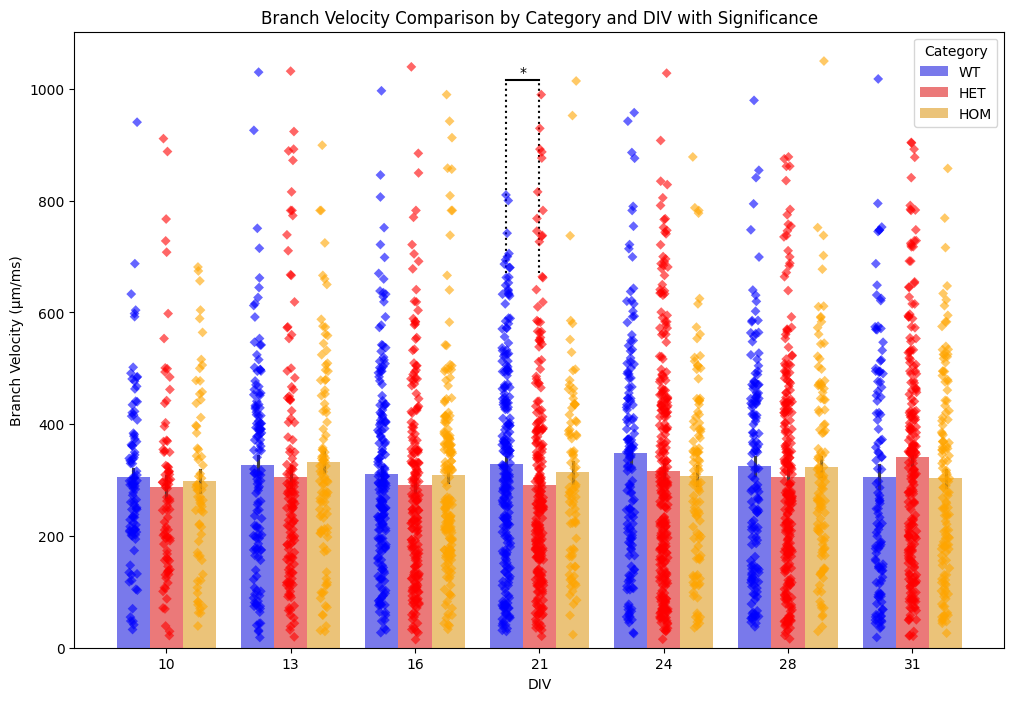

Disclaimer: Significance levels are indicated as follows: * for p <= 0.05, ** for p <= 0.01, *** for p <= 0.001, **** for p <= 0.0001.


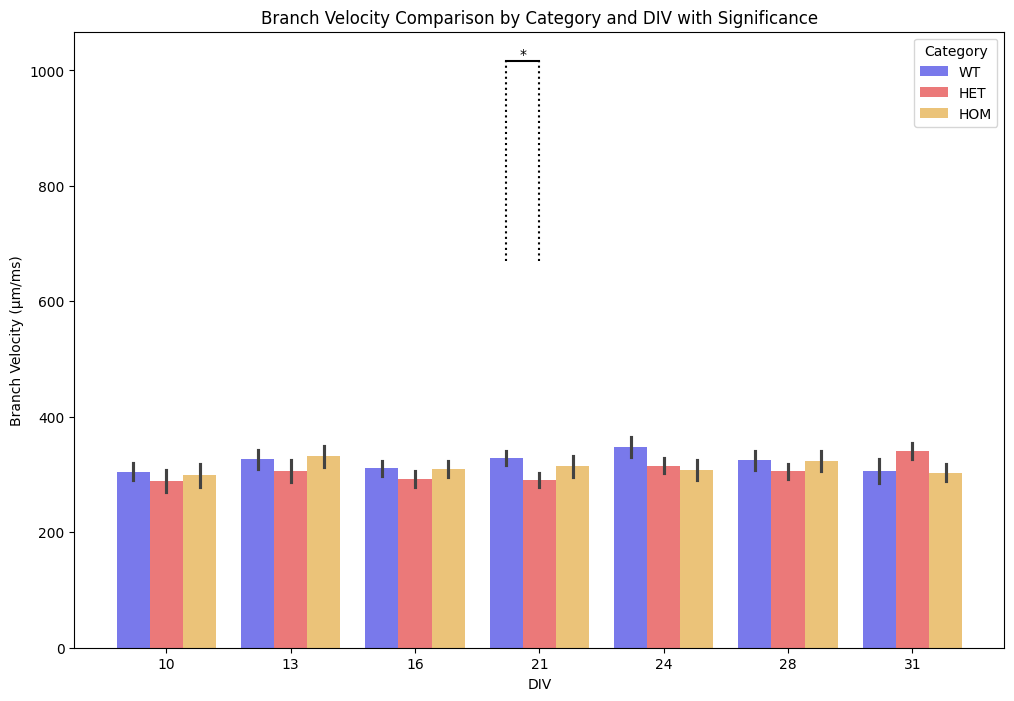

In [ ]:
# Plot data with significance annotations
save_svgs = False
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=True, print_stats=True)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison.svg', format='svg') 
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=False, print_stats=False)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison_noscatter.svg', format='svg') 

In [ ]:
# Plot data with significance annotations
save_svgs = False
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=True, print_stats=True)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison.svg', format='svg') 
ax = plot_with_significance(final_valid_data, 'Velocity', 'Branch Velocity Comparison by Category and DIV with Significance', 'Branch Velocity (µm/ms)', scatter=False, print_stats=False)
if save_svgs: ax.get_figure().savefig('branch_velocity_comparison_noscatter.svg', format='svg') 